In [1]:
pip install open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 4.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 89.5 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.



Processing: /kaggle/input/ideal-pcd/Ideal PCD.ply
Loaded 681270 points
Downsampled to 10000 points


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Completed clustering into 6 clusters
Saved clustering visualization to: /kaggle/working/clustering_results/clustering_Ideal PCD.png


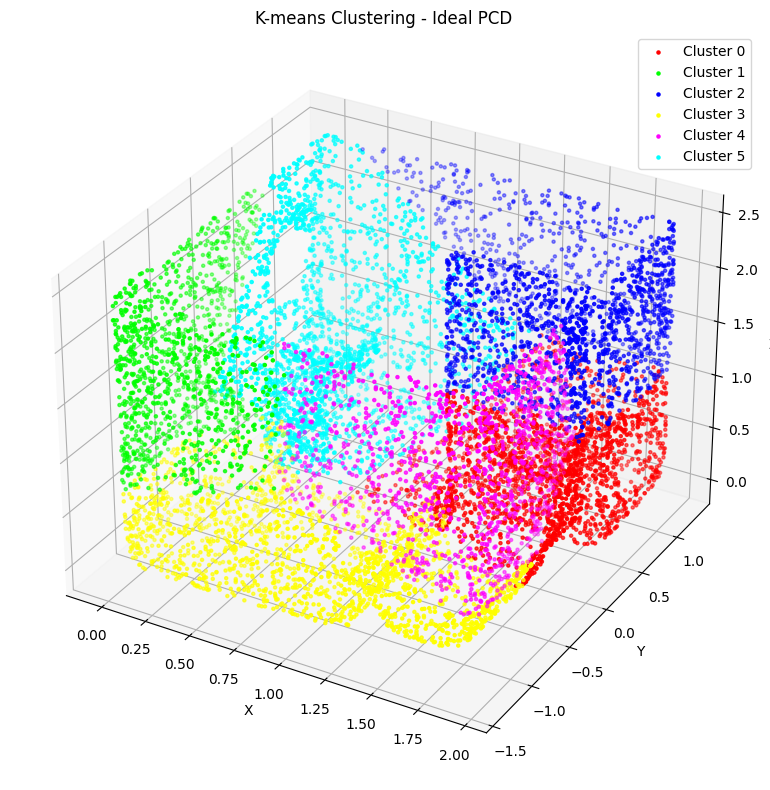


Processing: /kaggle/input/real-world/Real World PCD.pcd
Loaded 994153 points
Downsampled to 10000 points


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Completed clustering into 6 clusters
Saved clustering visualization to: /kaggle/working/clustering_results/clustering_Real World PCD.png


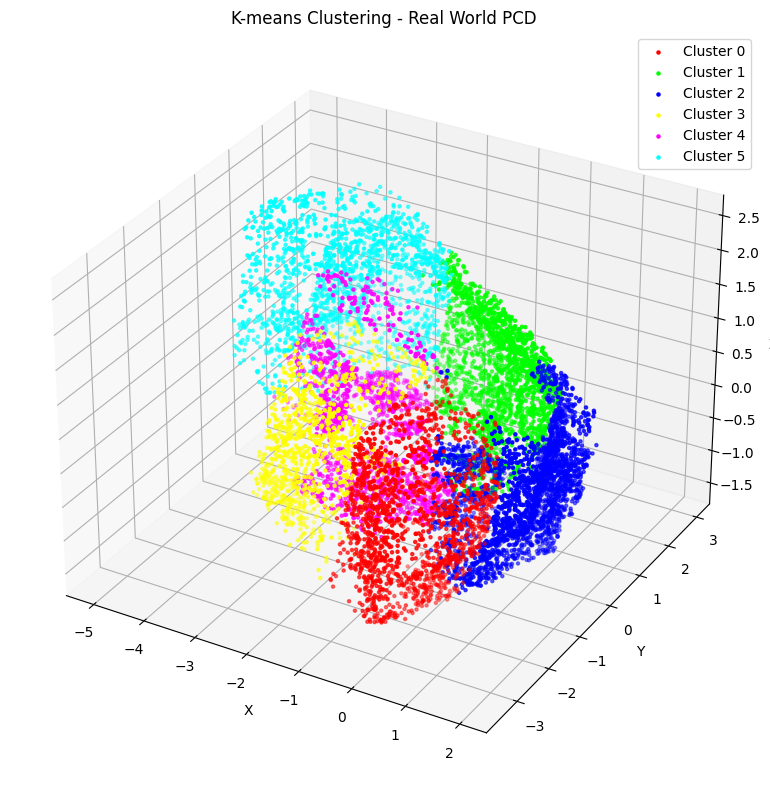

In [4]:
import numpy as np
import open3d as o3d
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from pathlib import Path
import os

class KMeansPointCloudClustering:
    def __init__(self):
        self.colors = [
            [1, 0, 0],    # Red
            [0, 1, 0],    # Green
            [0, 0, 1],    # Blue
            [1, 1, 0],    # Yellow
            [1, 0, 1],    # Magenta
            [0, 1, 1],    # Cyan
        ]
        # Create output directory if it doesn't exist
        self.output_dir = Path('/kaggle/working/clustering_results')
        os.makedirs(self.output_dir, exist_ok=True)

    def process_point_cloud(self, file_path, n_clusters=5, max_points=10000):
        """
        Process a single point cloud file with K-means clustering
        
        Parameters:
        file_path: str, path to the point cloud file
        n_clusters: int, number of clusters
        max_points: int, maximum number of points to process for efficiency
        """
        # Load point cloud
        print(f"\nProcessing: {file_path}")
        pcd = o3d.io.read_point_cloud(file_path)
        points = np.asarray(pcd.points)
        
        print(f"Loaded {len(points)} points")
        
        # Downsample if necessary
        if len(points) > max_points:
            indices = np.random.choice(len(points), max_points, replace=False)
            points = points[indices]
            print(f"Downsampled to {len(points)} points")
        
        # Perform K-means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(points)
        
        print(f"Completed clustering into {n_clusters} clusters")
        
        # Visualize and save results
        self.visualize_clusters(points, labels, Path(file_path).stem)
        
        return points, labels, kmeans.cluster_centers_
    
    def visualize_clusters(self, points, labels, title):
        """
        Visualize the clustering results, display and save to file
        """
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        # Plot each cluster
        for i in range(max(labels) + 1):
            mask = labels == i
            color = self.colors[i % len(self.colors)]
            ax.scatter(points[mask, 0], points[mask, 1], points[mask, 2],
                      c=[color], s=5, label=f'Cluster {i}')
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'K-means Clustering - {title}')
        
        plt.legend()
        plt.tight_layout()
        
        # Save the plot
        output_path = self.output_dir / f'clustering_{title}.png'
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"Saved clustering visualization to: {output_path}")
        
        # Display the plot
        plt.show()
        
        # Clear the current figure to free memory
        plt.close(fig)
    
    def process_multiple_files(self, file_paths, n_clusters=5, max_points=10000):
        """
        Process multiple point cloud files
        """
        results = {}
        for file_path in file_paths:
            try:
                points, labels, centers = self.process_point_cloud(
                    file_path, 
                    n_clusters=n_clusters,
                    max_points=max_points
                )
                results[file_path] = (points, labels, centers)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
        return results

# Example usage
def main():
    # Create the clustering object
    clusterer = KMeansPointCloudClustering()
    
    # Specify your file paths
    file_paths = [
        '/kaggle/input/ideal-pcd/Ideal PCD.ply',
        '/kaggle/input/real-world/Real World PCD.pcd'
    ]
    
    # Process the files
    results = clusterer.process_multiple_files(
        file_paths,
        n_clusters=6,      # Number of clusters
        max_points=10000   # Maximum points to process
    )

if __name__ == "__main__":
    main()